In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt')

from pathlib import Path


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rebika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('../data/complaints.csv')
df.shape, df.columns


C:\Users\rebika\AppData\Local\Temp\ipykernel_30600\1119889071.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/complaints.csv')


((9609797, 18),
 Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
        'Consumer complaint narrative', 'Company public response', 'Company',
        'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
        'Submitted via', 'Date sent to company', 'Company response to consumer',
        'Timely response?', 'Consumer disputed?', 'Complaint ID'],
       dtype='object'))

In [3]:
df.head()
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,9609797,9609797,9374502,9609791,8770275,2980756,4839590,9609797,9555281,9579569,628768,7960236,9609797,9609797,9609777,9609797,768299,9.609797e+06
unique,4952,21,86,178,272,2108758,11,7674,63,34965,3,4,7,4901,8,2,2,NaN
top,2025-01-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2025-02-25,Closed with explanation,Yes,No,NaN
freq,34093,4834855,6955847,3613761,2324057,21622,4537468,2321626,1273171,172807,391563,4639279,9017914,32525,5487712,9535859,619921,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.092744e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.774842e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.038016e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.448508e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.129591e+07


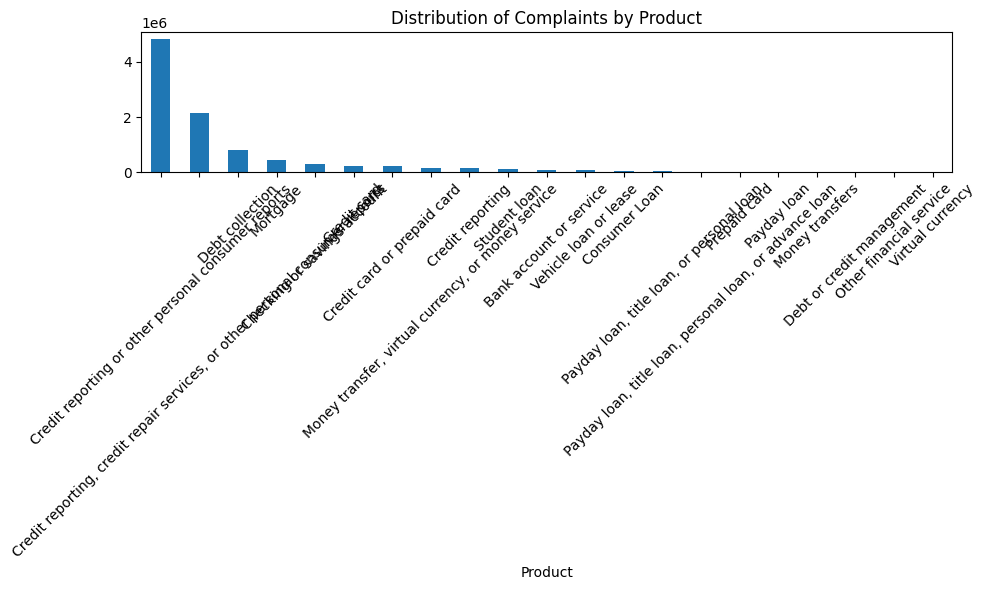

In [4]:
plt.figure(figsize=(10,6))
df['Product'].value_counts().plot(kind='bar')
plt.title('Distribution of Complaints by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


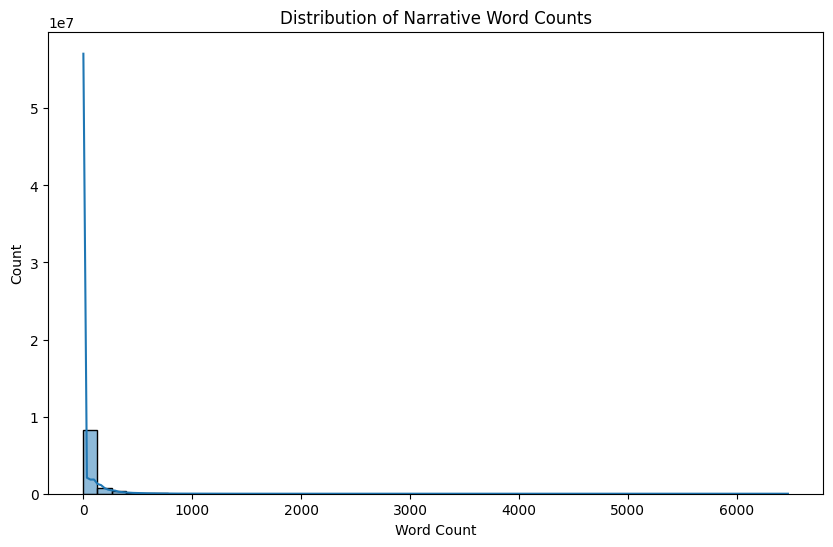

In [5]:
df['NarrativeLength'] = df['Consumer complaint narrative'].fillna("").apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(df['NarrativeLength'], bins=50, kde=True)
plt.title('Distribution of Narrative Word Counts')
plt.xlabel('Word Count')
plt.show()


In [7]:
n_with = df['Consumer complaint narrative'].notna().sum()
n_without = df['Consumer complaint narrative'].isna().sum()
print(f"With narratives: {n_with}, Without narratives: {n_without}")


With narratives: 2980756, Without narratives: 6629041


In [8]:
target_products = [
    'Credit card', 'Personal loan',
    'Buy Now, Pay Later', 'Savings account',
    'Money transfer, virtual currency, or money service'
]

df_filtered = df[df['Product'].isin(target_products)].copy()


In [9]:
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].notna()]


In [10]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove special characters
    text = re.sub(r'\bi am writing.*?\.', '', text)  # remove boilerplate intro
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_filtered['Cleaned_Narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)


In [11]:
output_path = Path('../data/filtered_complaints.csv')
df_filtered.to_csv(output_path, index=False)
print(f"Filtered dataset saved to {output_path}")


Filtered dataset saved to ..\data\filtered_complaints.csv
